In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical

In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.shape

(28000, 784)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(1    4684
 7    4401
 3    4351
 9    4188
 2    4177
 6    4137
 0    4132
 4    4072
 8    4063
 5    3795
 Name: label, dtype: int64,
 <AxesSubplot:xlabel='label', ylabel='count'>)

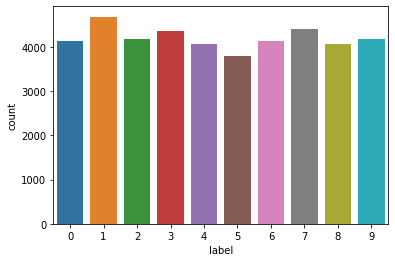

In [7]:
train['label'].value_counts() , sns.countplot(train['label'])

In [8]:
x_train = train.drop(['label'],axis=1)
y_train = train['label']

In [9]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
x_train = np.array(x_train)

In [11]:
x_train.shape , y_train.shape , test.shape

((42000, 784), (42000,), (28000, 784))

In [12]:
x_train = np.reshape(x_train, (42000,28,28), order='C')

In [13]:
x_train , x_train.shape

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [14]:
test = np.array(test)
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
x_train = x_train/255
test = test/255

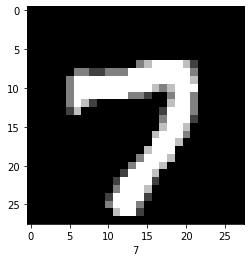

In [28]:
 # Takes in a index and displays images
def display_img(i):
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(y_train[i])
    
display_img(41997)

In [37]:
x_train_final = x_train.reshape(-1,28,28,1)
x_train_final.shape

(42000, 28, 28, 1)

In [20]:
test = test.reshape(-1,28,28,1)
test.shape

(28000, 28, 28, 1)

In [23]:
y_train = np.array(y_train)
label = to_categorical(y_train)
label

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [26]:
y_train , y_train.shape , label.shape

(array([1, 0, 1, ..., 7, 6, 9]), (42000,), (42000, 10))

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [33]:
model = Sequential([
    Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 128)        

In [47]:
model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'])

In [48]:
x_train_final.shape , label.shape

((42000, 28, 28, 1), (42000, 10))

In [49]:
model.fit(x_train_final,
          label,
         epochs=40,
         batch_size=64)

Epoch 1/40
657/657 [==============================] - 22s 33ms/step - loss: 0.6685 - accuracy: 0.7764
Epoch 2/40
657/657 [==============================] - 22s 33ms/step - loss: 0.0877 - accuracy: 0.9726
Epoch 3/40
657/657 [==============================] - 22s 33ms/step - loss: 0.0638 - accuracy: 0.9806
Epoch 4/40
657/657 [==============================] - 21s 33ms/step - loss: 0.0546 - accuracy: 0.9836
Epoch 5/40
657/657 [==============================] - 22s 33ms/step - loss: 0.0439 - accuracy: 0.9862
Epoch 6/40
657/657 [==============================] - 21s 33ms/step - loss: 0.0411 - accuracy: 0.9870
Epoch 7/40
657/657 [==============================] - 21s 32ms/step - loss: 0.0371 - accuracy: 0.9881
Epoch 8/40
657/657 [==============================] - 22s 33ms/step - loss: 0.0314 - accuracy: 0.9898
Epoch 9/40
657/657 [==============================] - 22s 33ms/step - loss: 0.0304 - accuracy: 0.9903
Epoch 10/40
657/657 [==============================] - 21s 32ms/step - loss: 0.025

In [50]:
y_pred = model.predict(test)
y_pred_classes = np.argmax(y_pred,axis=1)

In [51]:
submission_data = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

In [52]:
submission_data['Label'] = y_pred_classes

In [53]:
submission_data.to_csv('Final.csv', index=False)